# PCA Implementation using Python and Scikit-Learn

Today, I am learning about PCA and how it is used to reduce the amount of features in a data set and make my machine learning models run faster. 

I will be using the following libraries:

 - `pandas`
 - `sklearn`
 - Either `plotly.express` or `matplotlib`
 - Possibly `Numpy`

 Let the fun begin!!!

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
# importing 500hits.csv
df = pd.read_csv('2022mlbteams.csv')
df.head()

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,57,26.5,4.33,162,6027,5351,702,1232,262,...,0.385,0.689,95,2061,97,60,31,50,14,1039
1,Atlanta Braves,53,27.5,4.87,162,6082,5509,789,1394,298,...,0.443,0.761,109,2443,103,66,1,36,13,1030
2,Baltimore Orioles,58,27.0,4.16,162,6049,5429,674,1281,275,...,0.390,0.695,99,2119,95,83,12,43,10,1095
3,Boston Red Sox,54,28.8,4.54,162,6144,5539,735,1427,352,...,0.409,0.731,102,2268,131,63,12,50,23,1133
4,Chicago Cubs,64,27.9,4.06,162,6072,5425,657,1293,265,...,0.387,0.698,94,2097,130,84,19,36,16,1100


In [19]:
#Cleaning the data
df.drop('Tm', axis=1, inplace=True)
X = df.iloc[:, 0:27]
y = df.iloc[:, 27]

In [20]:
# Spliting the data and scaling
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)

In [21]:
df.columns

Index(['#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB'],
      dtype='object')

In [22]:
X_train = pd.DataFrame(X_train, columns=df.columns[0:27])
X_train.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,-0.223287,0.742410,1.108853,-0.204124,-0.201349,-0.202658,-0.185264,-0.195564,-0.188424,-0.202331,...,1.158097,0.965464,1.062185,1.237810,-0.191982,-0.202319,-0.167528,-0.311475,-0.184097,-0.257264
1,-0.170089,-0.080458,-1.091632,-0.204124,-0.206801,-0.205016,-0.223051,-0.211663,-0.235629,-0.120482,...,-1.171409,-0.249465,-0.571079,-0.762053,-0.207768,-0.228711,-0.234497,-0.042033,-0.270284,-0.069076
2,-0.202008,-1.360476,0.056447,-0.204124,-0.205351,-0.207341,-0.203016,-0.216054,-0.207040,-0.177777,...,-0.589032,-0.451954,-0.514760,-0.551541,-0.212267,-0.225606,-0.219043,0.038800,-0.162550,-0.224055
3,-0.177182,-0.080458,-0.589347,-0.204124,-0.204046,-0.204951,-0.214428,-0.207938,-0.205045,-0.120482,...,-0.006656,-0.370958,-0.261322,-0.656797,-0.209323,-0.174374,-0.157224,-0.122866,-0.222881,-0.201915
4,-0.187822,-0.994757,-0.015308,-0.204124,-0.202857,-0.203304,-0.204538,-0.199556,-0.202386,-0.226886,...,0.492524,0.196009,0.301872,0.501018,-0.201307,-0.169717,-0.213891,-0.244115,-0.179787,-0.257264


In [23]:
X_train.describe().round(2)

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,...,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,...,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02
min,-0.25,-1.91,-1.90,-0.20,-0.21,-0.21,-0.24,-0.23,-0.24,-0.31,...,-2.50,-2.03,-2.29,-1.71,-0.23,-0.25,-0.25,-0.37,-0.27,-0.31
25%,-0.22,-0.81,-0.59,-0.20,-0.21,-0.21,-0.21,-0.21,-0.22,-0.25,...,-0.59,-0.57,-0.57,-0.66,-0.21,-0.23,-0.23,-0.27,-0.23,-0.26
50%,-0.21,0.01,-0.02,-0.20,-0.20,-0.20,-0.20,-0.20,-0.20,-0.21,...,0.08,-0.25,-0.23,-0.03,-0.21,-0.20,-0.21,-0.22,-0.20,-0.22
75%,-0.19,0.74,0.58,-0.20,-0.20,-0.20,-0.19,-0.19,-0.19,-0.14,...,0.58,0.97,0.89,0.82,-0.19,-0.18,-0.17,-0.12,-0.18,-0.14
max,4.90,2.02,2.21,4.90,4.90,4.90,4.90,4.90,4.90,4.89,...,1.82,1.90,1.91,1.76,4.90,4.90,4.90,4.88,4.90,4.88


In [ ]:
# Making the First Model

pca_1 = PCA()
X_pca_1 = pca_1.fit_transform(X_train)

In [9]:
pca_1.explained_variance_ratio_

array([7.39701889e-01, 2.02639933e-01, 3.48165968e-02, 1.20962483e-02,
       5.89307186e-03, 2.55574094e-03, 1.58674686e-03, 3.18951739e-04,
       1.42521543e-04, 1.09548164e-04, 6.29038533e-05, 3.37812571e-05,
       1.96226159e-05, 9.23470527e-06, 6.44773031e-06, 5.12598144e-06,
       1.03072108e-06, 3.26973470e-07, 2.32225539e-07, 3.73407431e-08,
       5.83379208e-09, 2.18094193e-09, 7.37706854e-10, 8.19056923e-11,
       2.68944200e-35])

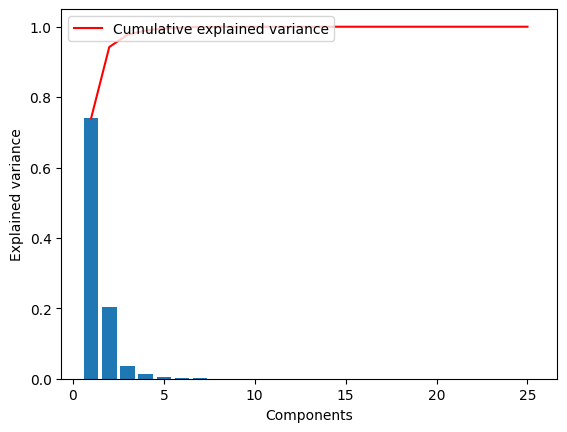

In [10]:
# Visualizing the explained variance
plt.bar(range(1, len(pca_1.explained_variance_ratio_)+1), pca_1.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(pca_1.explained_variance_ratio_)+1),
         np.cumsum(pca_1.explained_variance_ratio_), c='red', label='Cumulative explained variance')
plt.legend(loc='upper left')
plt.show()

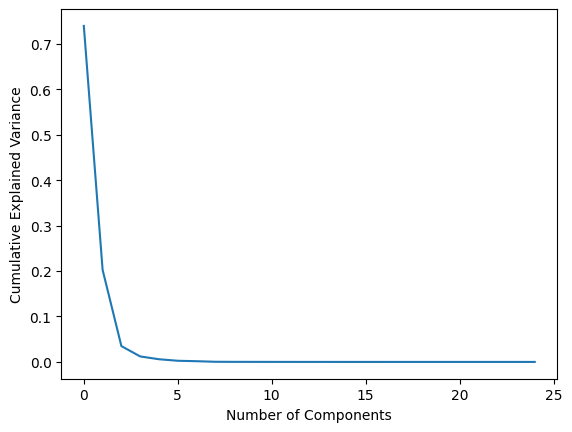

In [11]:
# Another Graph
plt.plot(pca_1.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [12]:
# Second PCA Model
pca_2 = PCA(0.95)
X_pca_2 = pca_2.fit_transform(X_train)

In [13]:
# Exploring the Shape of the Data
X_pca_2.shape

(25, 3)

In [14]:
# Explained VAriance Ratio of the Second Model
pca_2.explained_variance_ratio_

array([0.73970189, 0.20263993, 0.0348166 ])

In [15]:
# Making a third PCA Model using the n_components parameter
pca_3 = PCA(n_components=2)
X_pca_3 = pca_3.fit_transform(X_train)

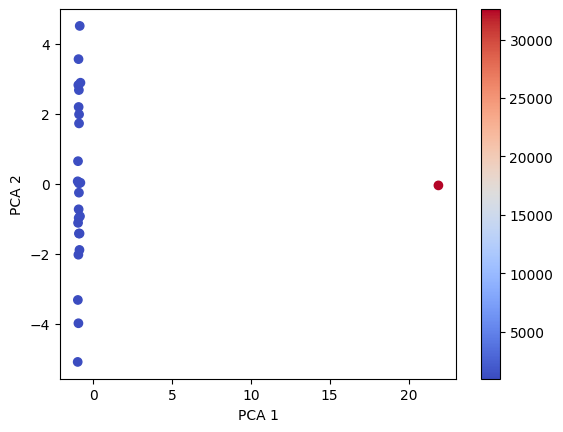

In [16]:
colormap = plt.get_cmap('coolwarm')
plt.figure()
scatter = plt.scatter(X_pca_3[:, 0], X_pca_3[:, 1], c=y_train, cmap=colormap)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter)
plt.show()

In [ ]:
#Exploring the shape of the Data for the third model
X_pca_3.shape